# Lab: Visualising Data {#sec-pandas-datavis}

In the previous chapter we started exploring some data by using some methods such as `describe`, `info`, `head`, `shape`... However, it is usually far easier to look at trends in data by creating plots. 

In this chapter we will be using `pandas`' built-in visualisation capabilities via [`matplotlib`](https://matplotlib.org/) to create some basic (but quick!) data visualisations from the _The Office_ dataset. We will be using these visualisations on the next chapter, whereas on @sec-seaborn we will use another plotting library to create customised visualisations.

## Starting

As usual, we will be starting by loading the required libraries and dataset(s):

In [1]:
import pandas as pd
df = pd.read_csv('data/raw/office_ratings.csv', encoding='UTF-8')

In [2]:
# Check our dataset.
df.head()

,season,episode,title,imdb_rating,total_votes,air_date
0,1,1,Pilot,7.6,3706,2005-03-24
1,1,2,Diversity Day,8.3,3566,2005-03-29
2,1,3,Health Care,7.9,2983,2005-04-05
3,1,4,The Alliance,8.1,2886,2005-04-12
4,1,5,Basketball,8.4,3179,2005-04-19


## Univariate plots - a single variable

Univariate plots are a great way to see trends. We will create them using  `plot` method.

In [3]:
# Read the documentation to understand how to use plot.
?df.plot

We can use `plot` to quicky visualise every variable[^variables] in the dataset.

[^variables]: Actually this may not be accurate. Are you missing any column? Can you guess why are they missing?

<Axes: >

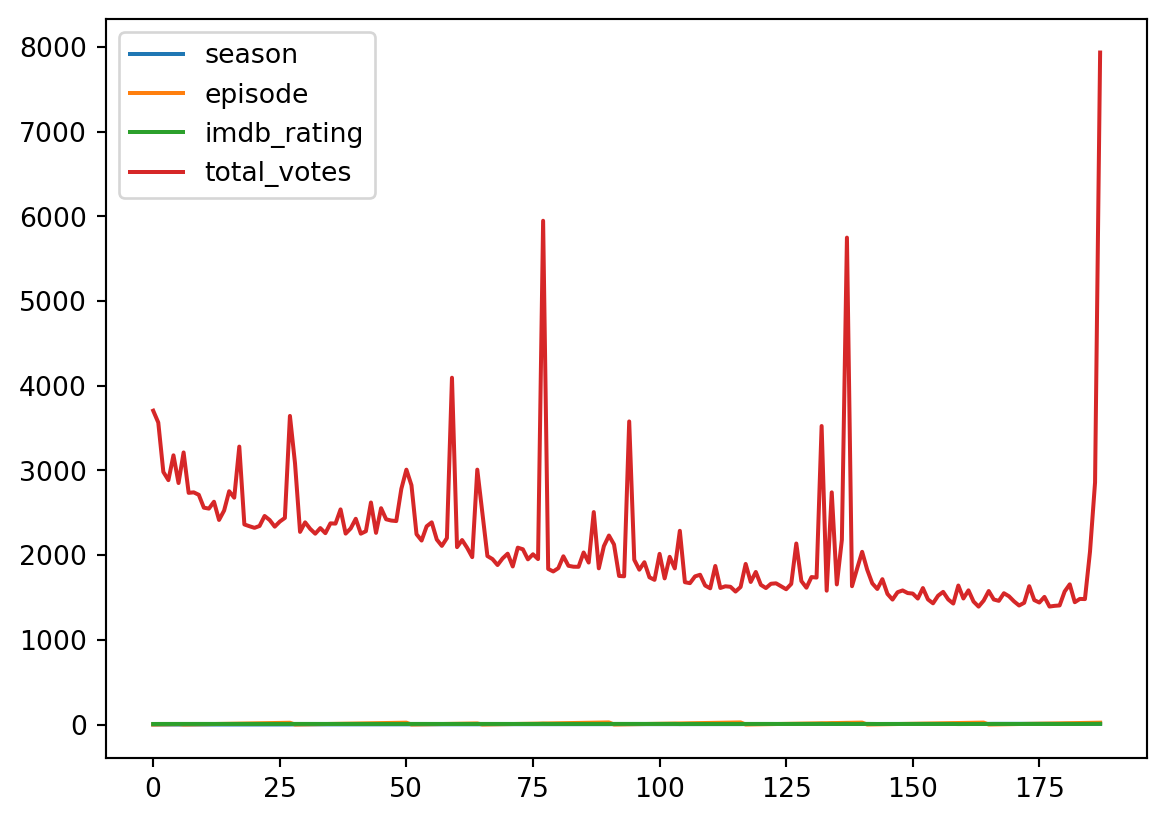

In [4]:
# Create a plot for every variable in the dataset
df.plot()

We can look at a specific column

<Axes: title={'center': 'Total Votes'}>

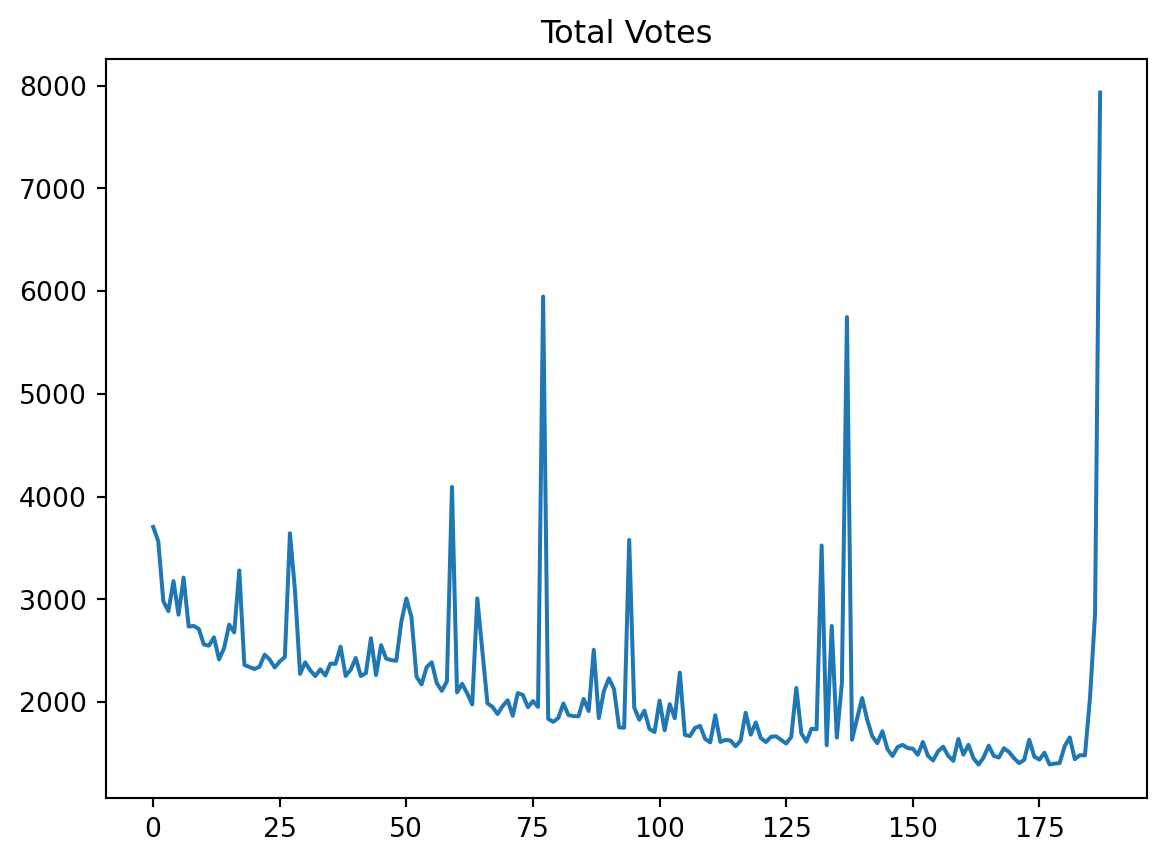

In [5]:
# Visualise a column and add a title.
df['total_votes'].plot(title='Total Votes')

### Subplots

We can also create subplots, where every variable is plotted individually and put next to the others, while sharing the axis.

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

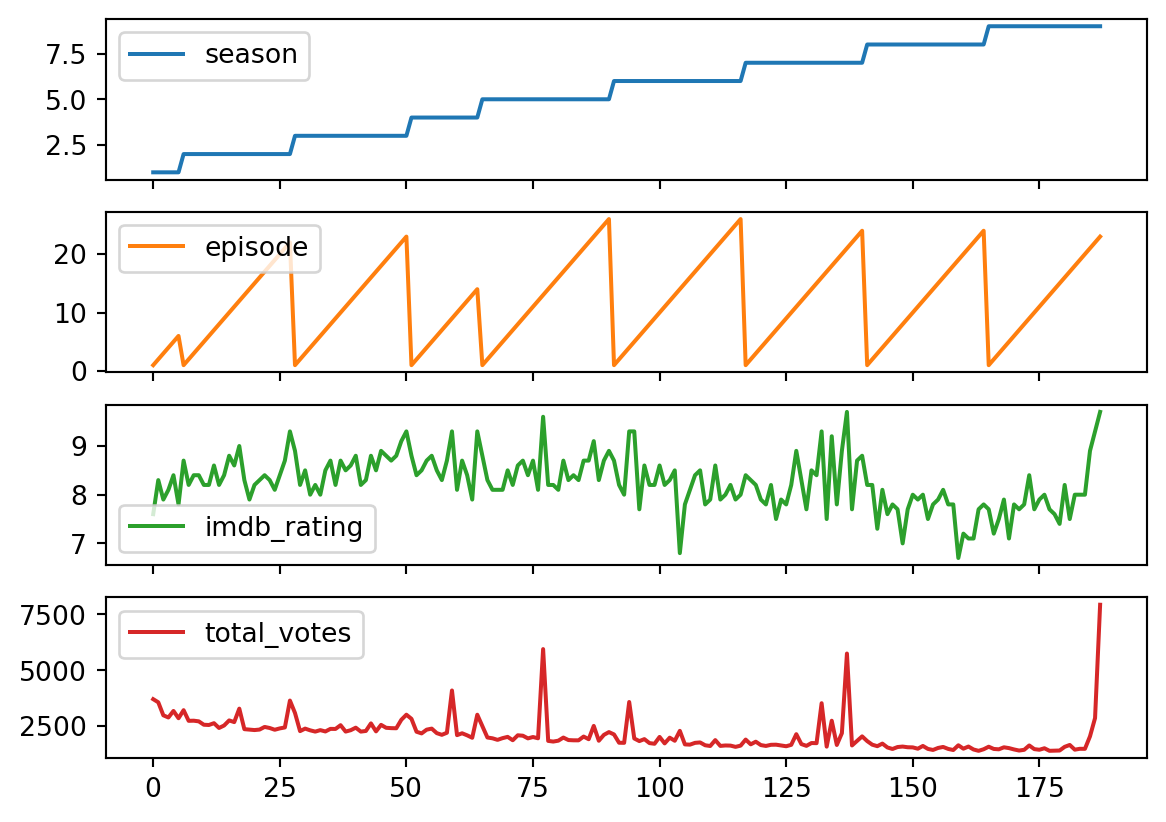

In [6]:
df.plot(subplots=True)

Season and episode is not at all informative here.

array([<Axes: >, <Axes: >], dtype=object)

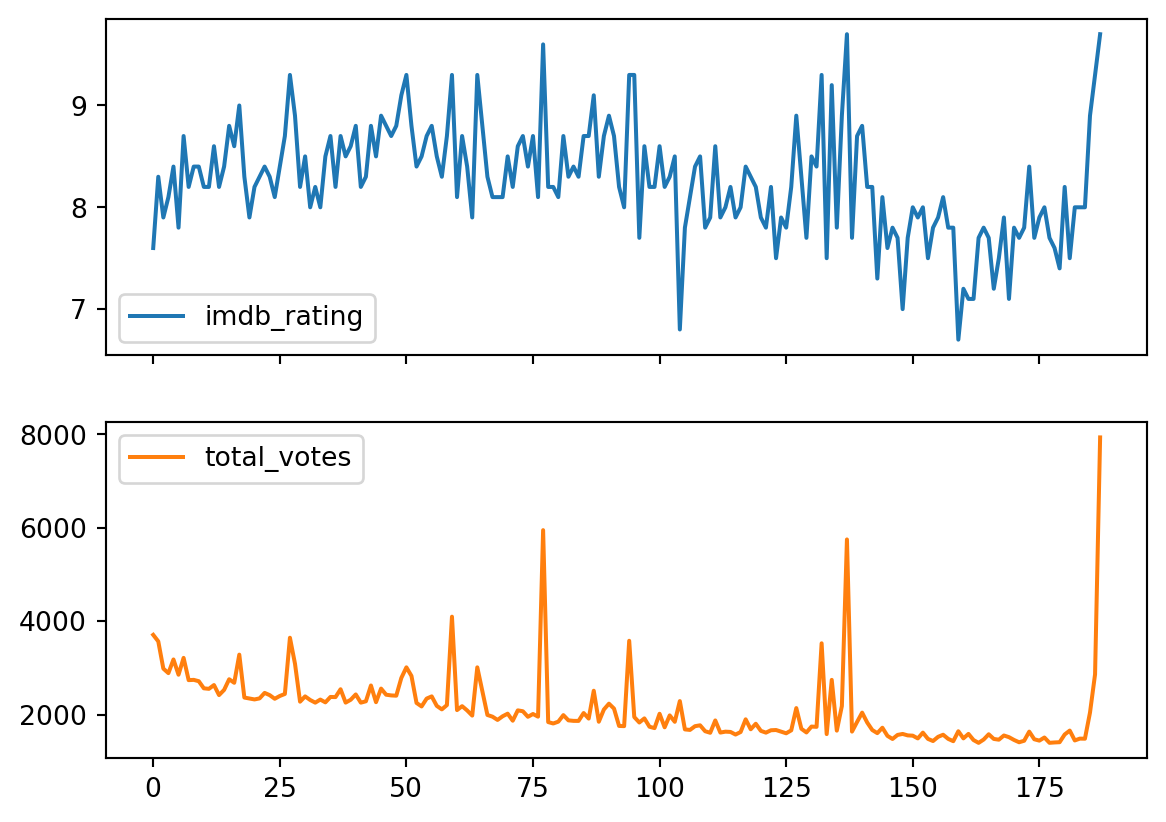

In [7]:
df[['imdb_rating', 'total_votes']].plot(subplots=True)

### Histograms

Often times, instead of seeing the actual values we may be interested in seeing how they are distributed. This is known as a [histogram](https://en.wikipedia.org/wiki/Histogram), and we can create them vy changing the plot type using the `kind` argument:

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

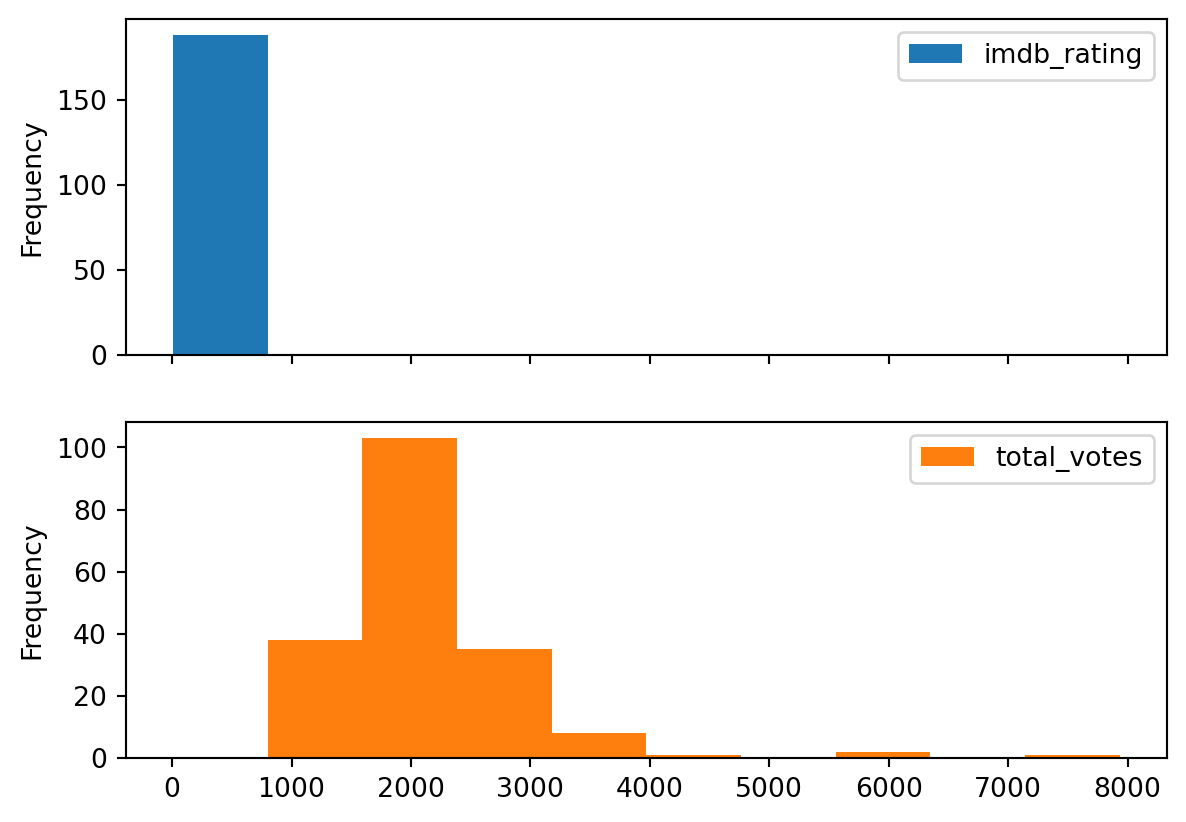

In [8]:
df[['imdb_rating', 'total_votes']].plot(subplots=True, kind='hist')

Unfortunatly, since subplots share axes, our x axis is bunched up. The above tells us that the all our IMDB ratings are between 0 and a little less than 1000... not useful.

Probably best to plot them individually.

<Axes: title={'center': 'Ratings per episode'}, ylabel='Frequency'>

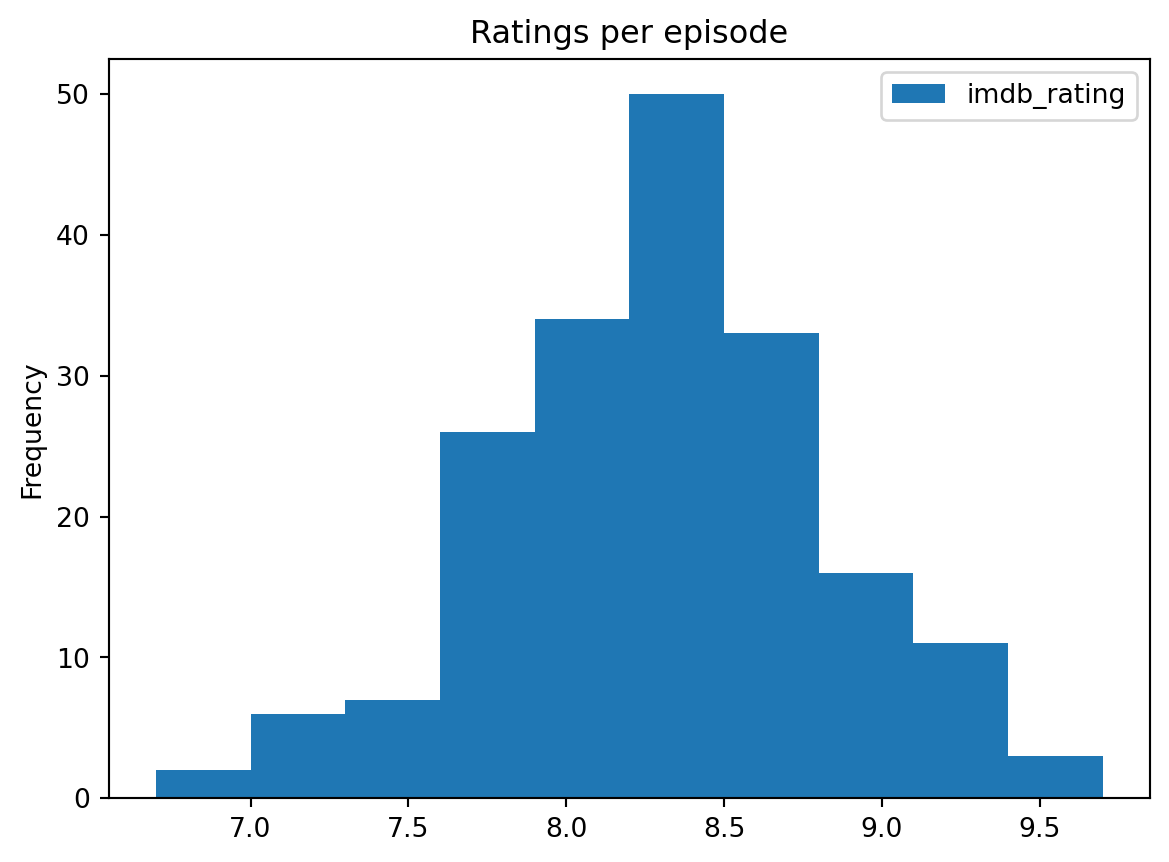

In [9]:
df[['imdb_rating']].plot(kind='hist', title = "Ratings per episode")

Quite a sensible gaussian shape (a central point with the frequency decreasing symmetrically).

<Axes: title={'center': 'Total votes per chapter'}, ylabel='Frequency'>

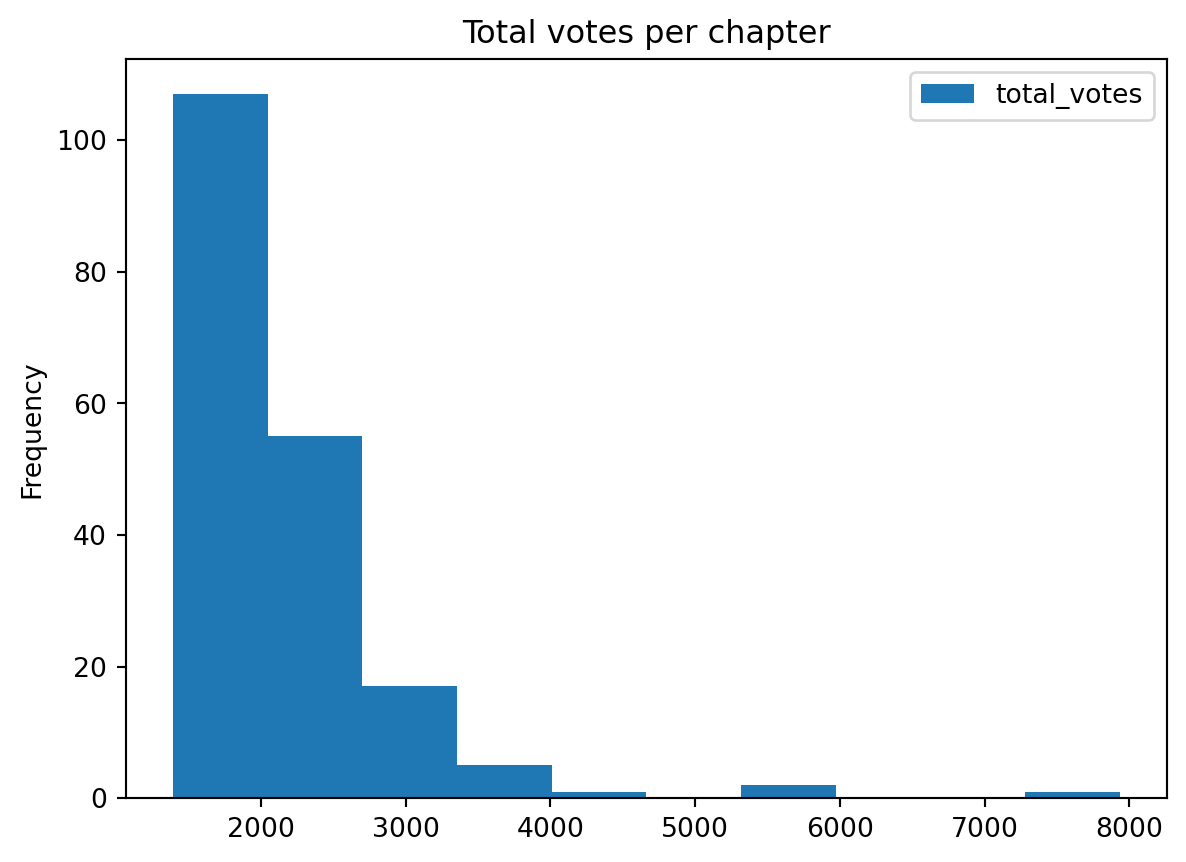

In [10]:
df[['total_votes']].plot(kind='hist', title= "Total votes per chapter")

A positively skewed distribution - many smaller values and very few high values.

## Bivariate - Two variables {#sec-dv-bibariate}

Sometimes, instead of visualising variables individually, we may want to see them in relation to others, so we can identify possible correlations. **Scatter plots** are simple ways to explore the relationship between two variables, where one is displayed on the `X` axis and the other one in the `Y` axis.

We may want to see if the number of votes and the imdb rating are not independent events. In other words, we want to know if these two data variables are related. We will be creating a scatterplot using the following syntax: `<object>.plot(x = "<variable1>", y = "<variable2>", kind = "scatter")`

<Axes: title={'center': 'IMDB ratings and total number of votes'}, xlabel='imdb_rating', ylabel='total_votes'>

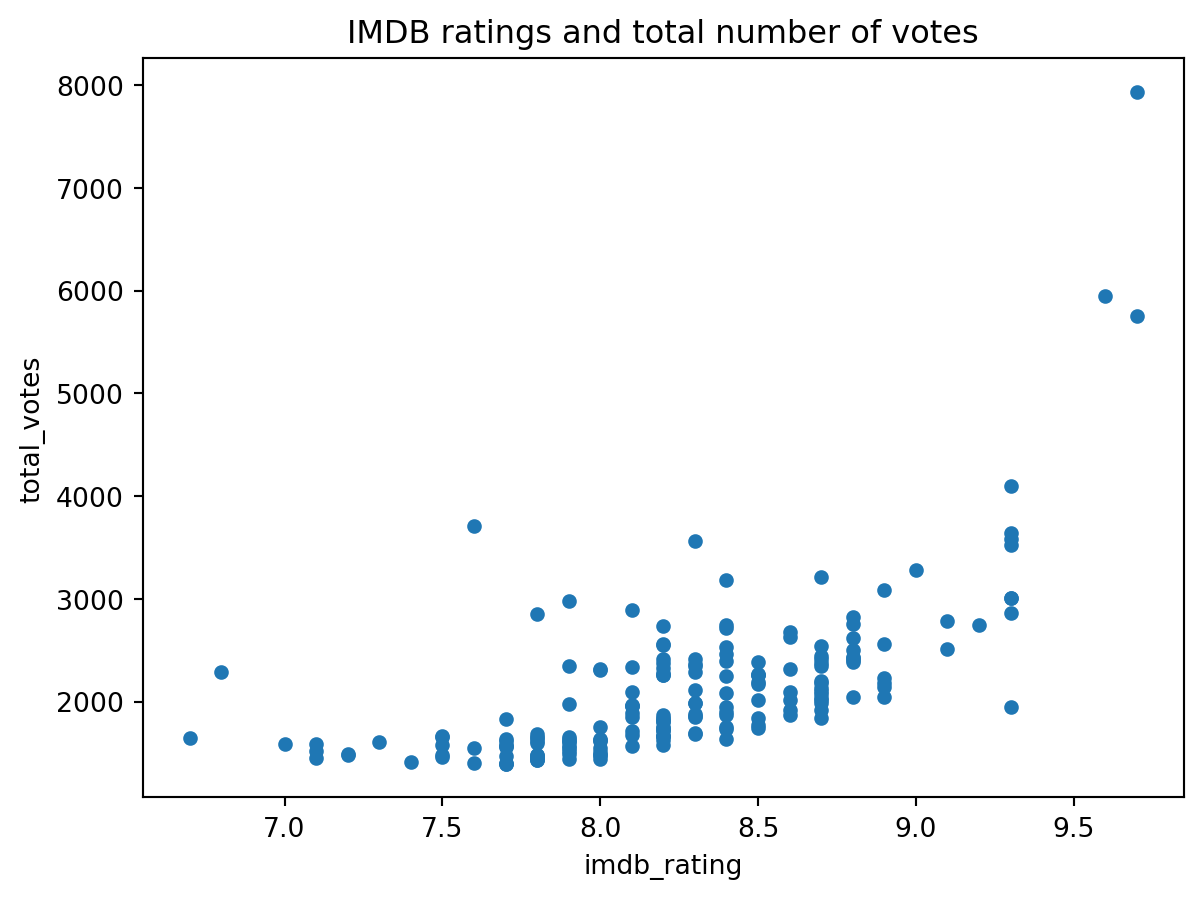

In [11]:
# Create a scatterplot
df.plot(x='imdb_rating', y='total_votes', kind='scatter', title='IMDB ratings and total number of votes')

That is really interesting. The episodes with the highest rating also have the greatest number of votes. There was a cleary a great outpouring of happiness there.

::: {.callout-caution collapse="true"}
### Which episodes were the most voted?

As seen previously, we could filter our dataset:

In [12]:
df[df['total_votes'] > 5000]

,season,episode,title,imdb_rating,total_votes,air_date
77,5,13,Stress Relief,9.6,5948,2009-02-01
137,7,21,"Goodbye, Michael",9.7,5749,2011-04-28
187,9,23,Finale,9.7,7934,2013-05-16


There are three chapters which received more than 5,000 votes.
:::



Excellent. We may want to know if there's any influence of season on the ratings:

<Axes: title={'center': 'IMDB ratings and season'}, xlabel='season', ylabel='imdb_rating'>

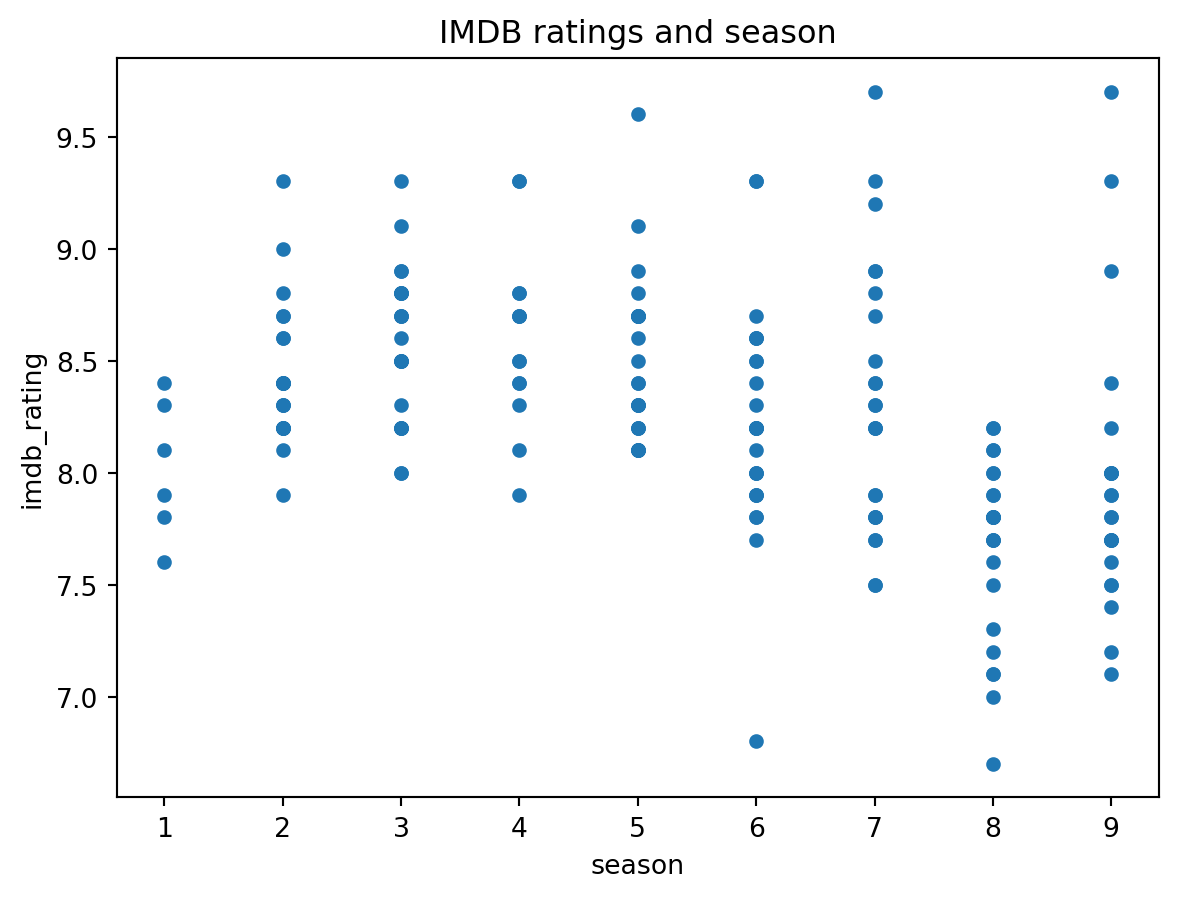

In [13]:
df.plot(x='season', y='imdb_rating', kind='scatter', title='IMDB ratings and season')

Season 8 seems to be a bit low. But nothing too extreme.

## Dates

Our data contains air date information. Currently, that column is `object` or a string.

In [14]:
df.head()

,season,episode,title,imdb_rating,total_votes,air_date
0,1,1,Pilot,7.6,3706,2005-03-24
1,1,2,Diversity Day,8.3,3566,2005-03-29
2,1,3,Health Care,7.9,2983,2005-04-05
3,1,4,The Alliance,8.1,2886,2005-04-12
4,1,5,Basketball,8.4,3179,2005-04-19


In [15]:
df.dtypes

season           int64
episode          int64
title           object
imdb_rating    float64
total_votes      int64
air_date        object
dtype: object

We know this is not accurate, so we can set this to be datetime instead by using the method `datetime`. That will help us plot the time series of the data.

In [16]:
# Convert air_date to a date.
df['air_date2'] =  pd.to_datetime(df['air_date'])

# Check the result
df.dtypes

season                  int64
episode                 int64
title                  object
imdb_rating           float64
total_votes             int64
air_date               object
air_date2      datetime64[ns]
dtype: object

<Axes: xlabel='air_date2', ylabel='total_votes'>

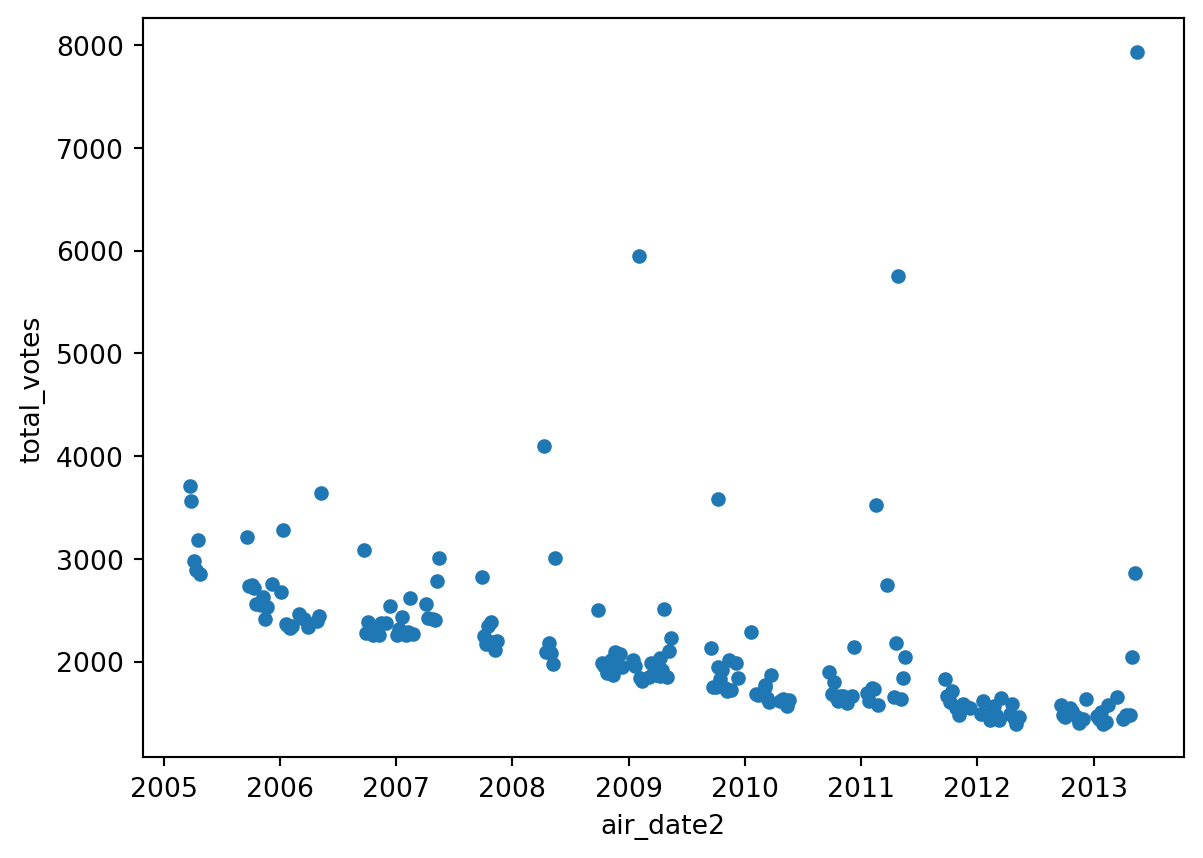

In [17]:
df.plot(x = 'air_date2', y = 'total_votes', kind='scatter')

::: callout-caution

### The importance of using the right data type

Can you spot any difference when trying to plot a date that is not stored as a date data type?

<Axes: xlabel='air_date', ylabel='total_votes'>

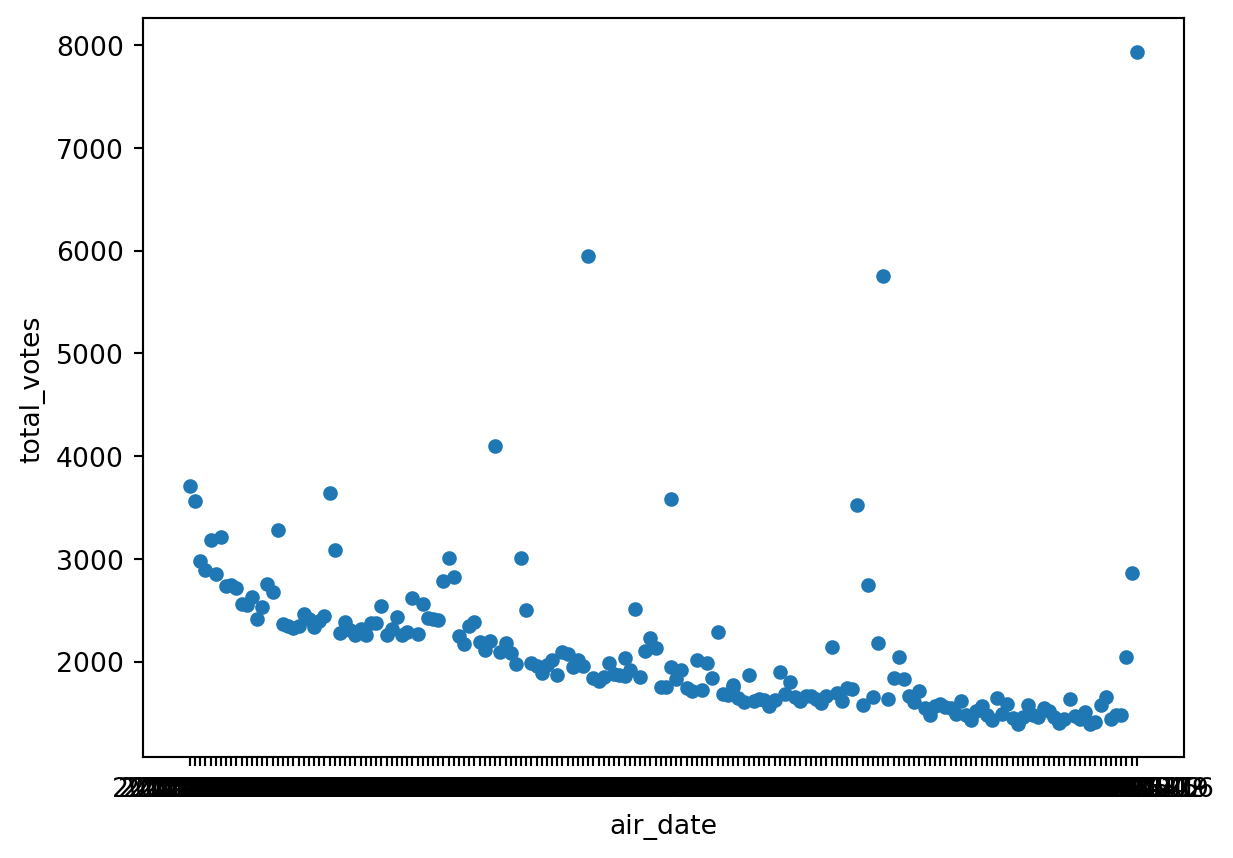

In [18]:
df.plot(x = 'air_date', y = 'total_votes', kind='scatter')

Right, this is probably not what we would expect!
:::

We can look at multiple variables using subplots.

array([<Axes: xlabel='air_date2'>, <Axes: xlabel='air_date2'>],
      dtype=object)

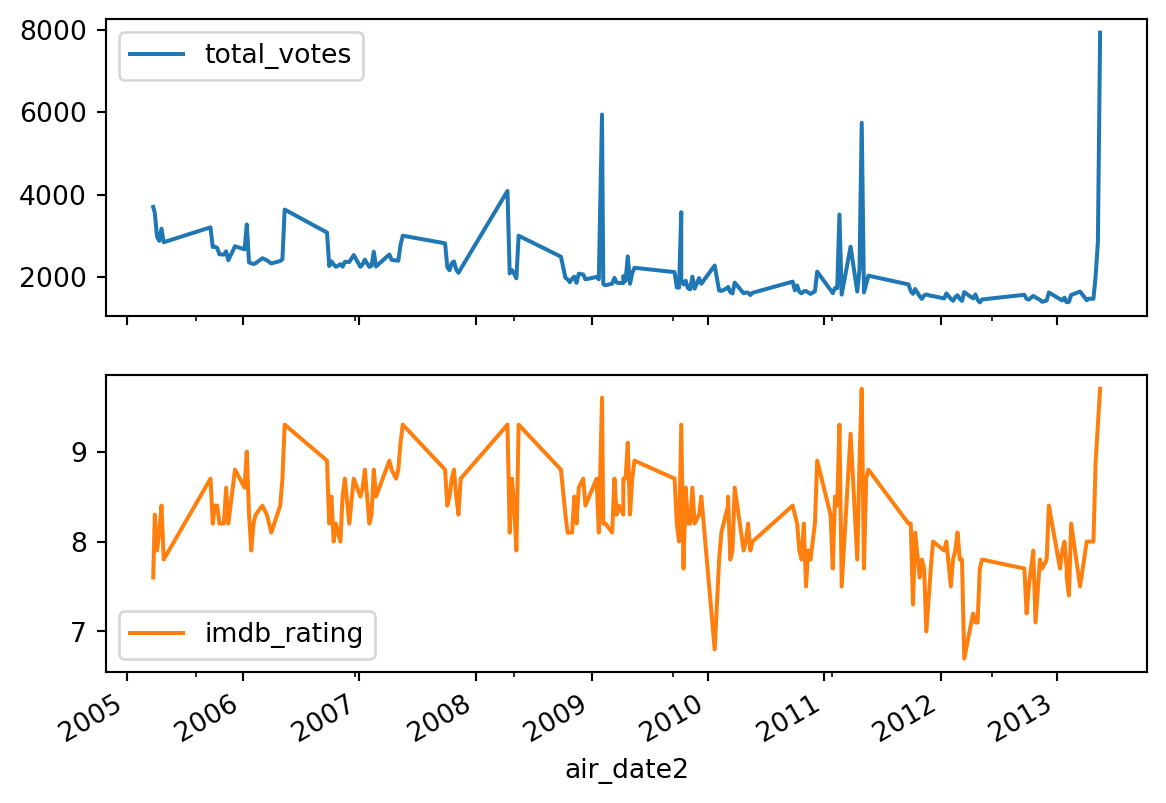

In [19]:
df[['air_date2', 'total_votes', 'imdb_rating']].plot(
    x = 'air_date2', subplots=True)

## Multivariate

Our dataset is quite simple. But we can look at two variables (`total_votes`, `imdb_rating`) by a third one (`season`), used as grouping.

season
1    Axes(0.125,0.11;0.775x0.77)
2    Axes(0.125,0.11;0.775x0.77)
3    Axes(0.125,0.11;0.775x0.77)
4    Axes(0.125,0.11;0.775x0.77)
5    Axes(0.125,0.11;0.775x0.77)
6    Axes(0.125,0.11;0.775x0.77)
7    Axes(0.125,0.11;0.775x0.77)
8    Axes(0.125,0.11;0.775x0.77)
9    Axes(0.125,0.11;0.775x0.77)
dtype: object

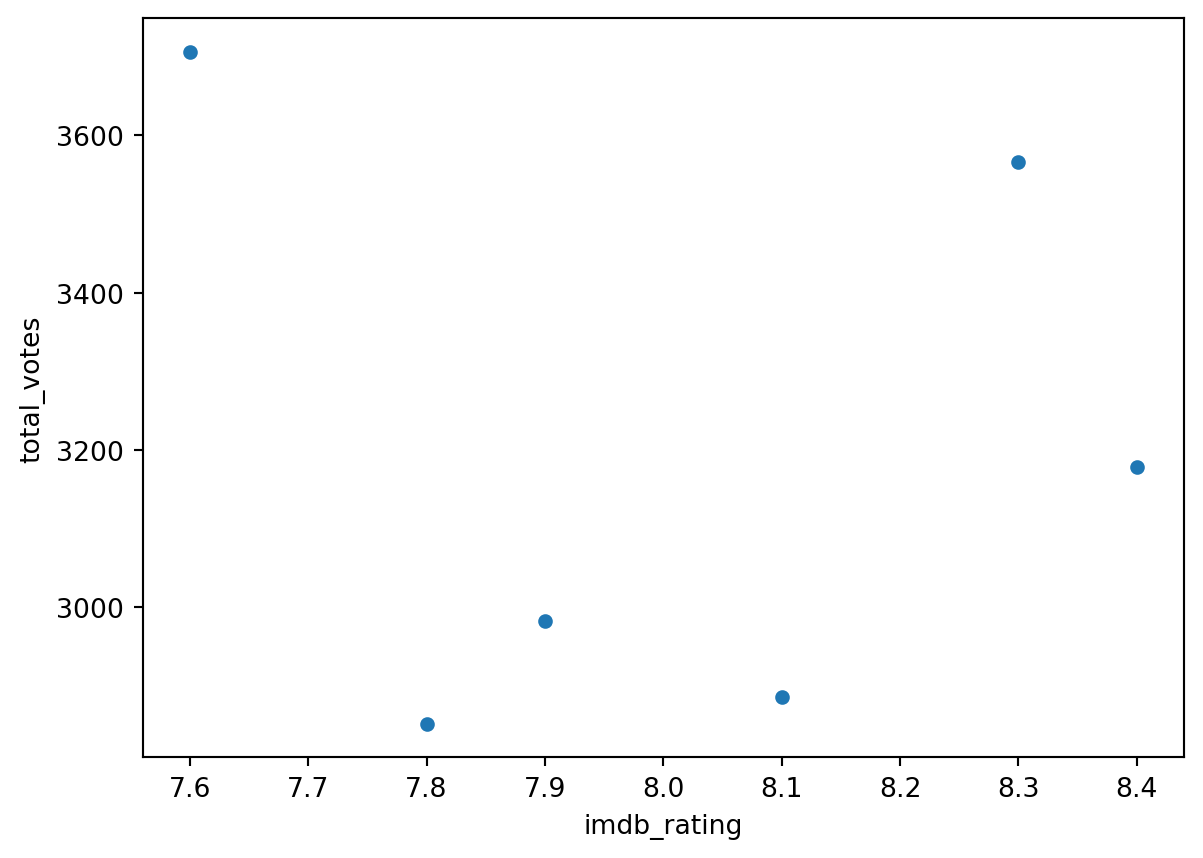

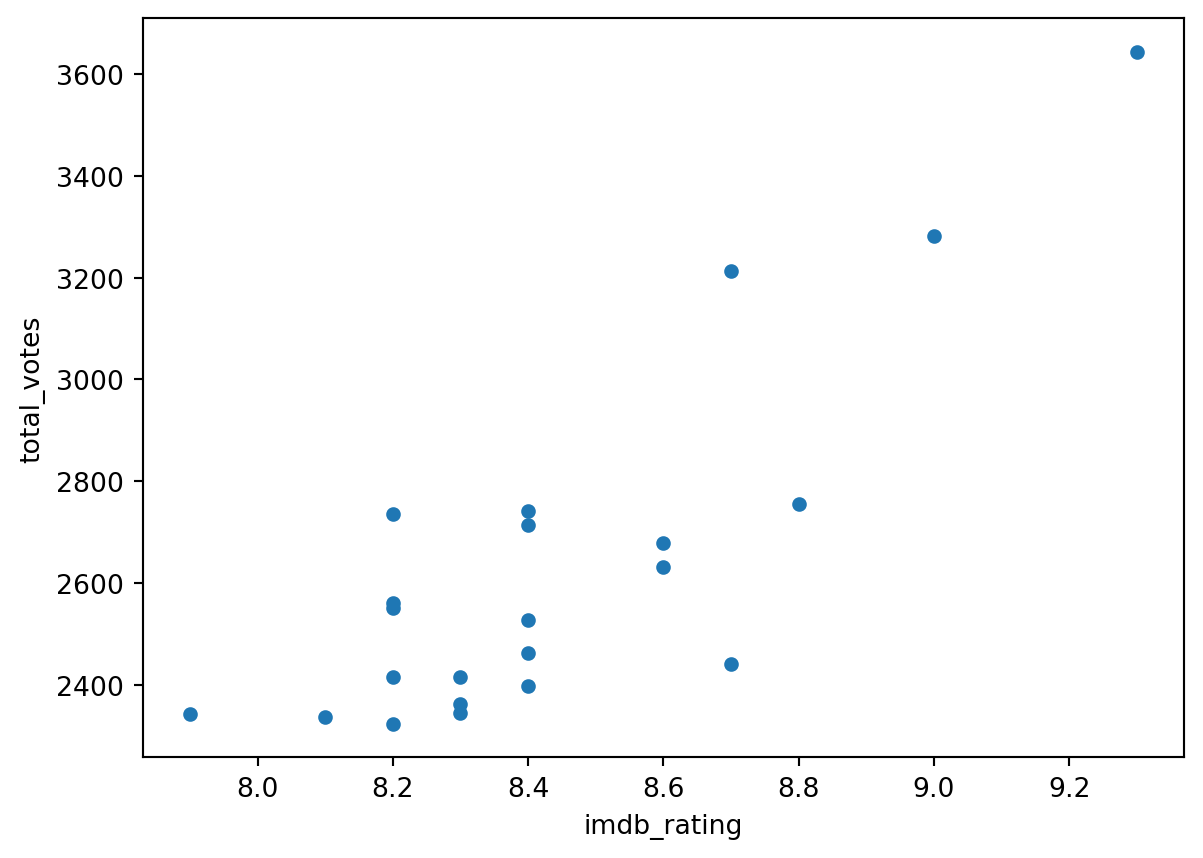

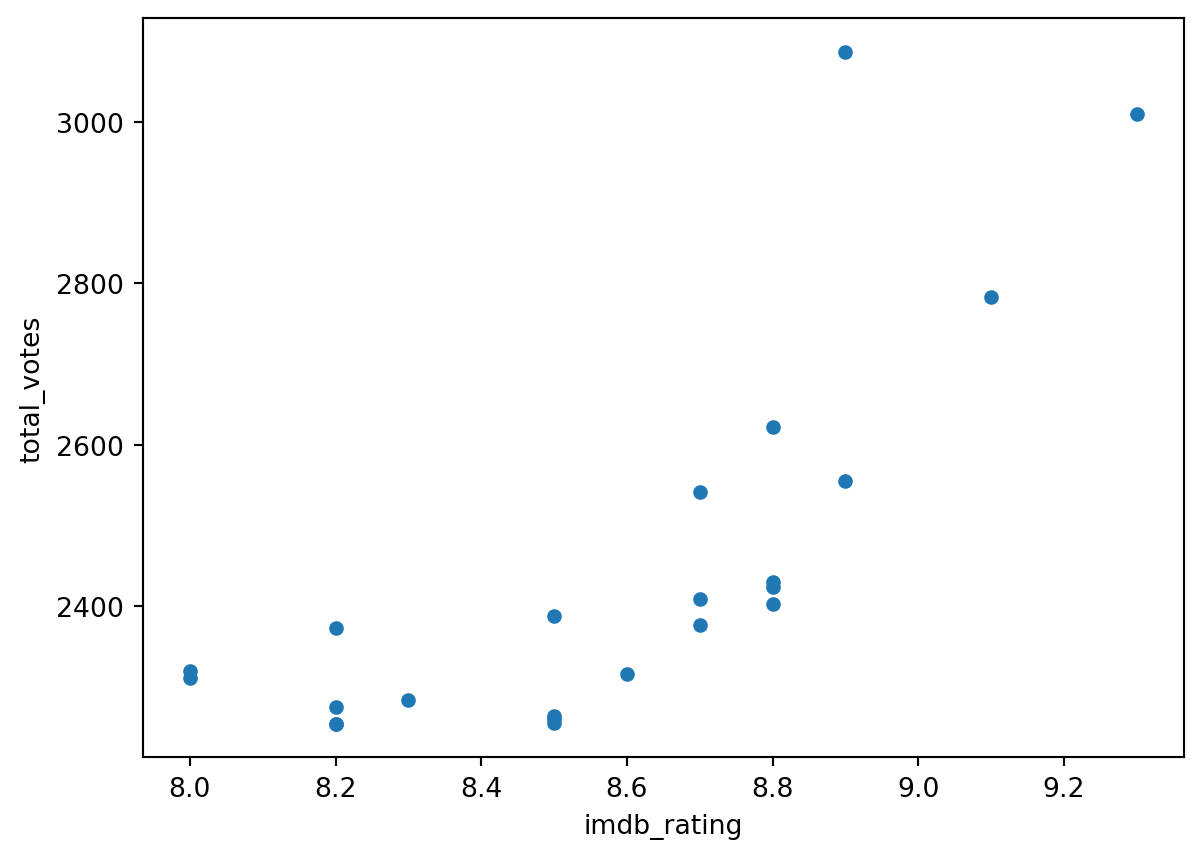

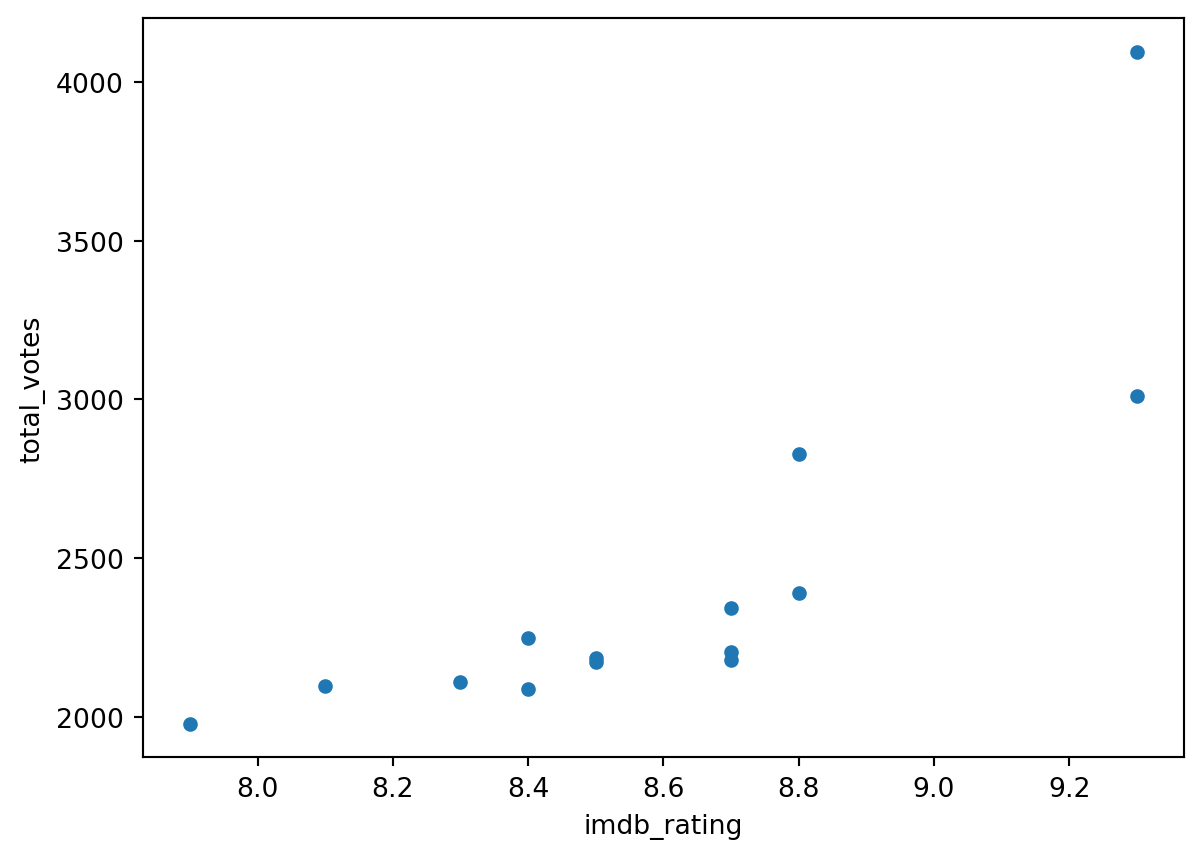

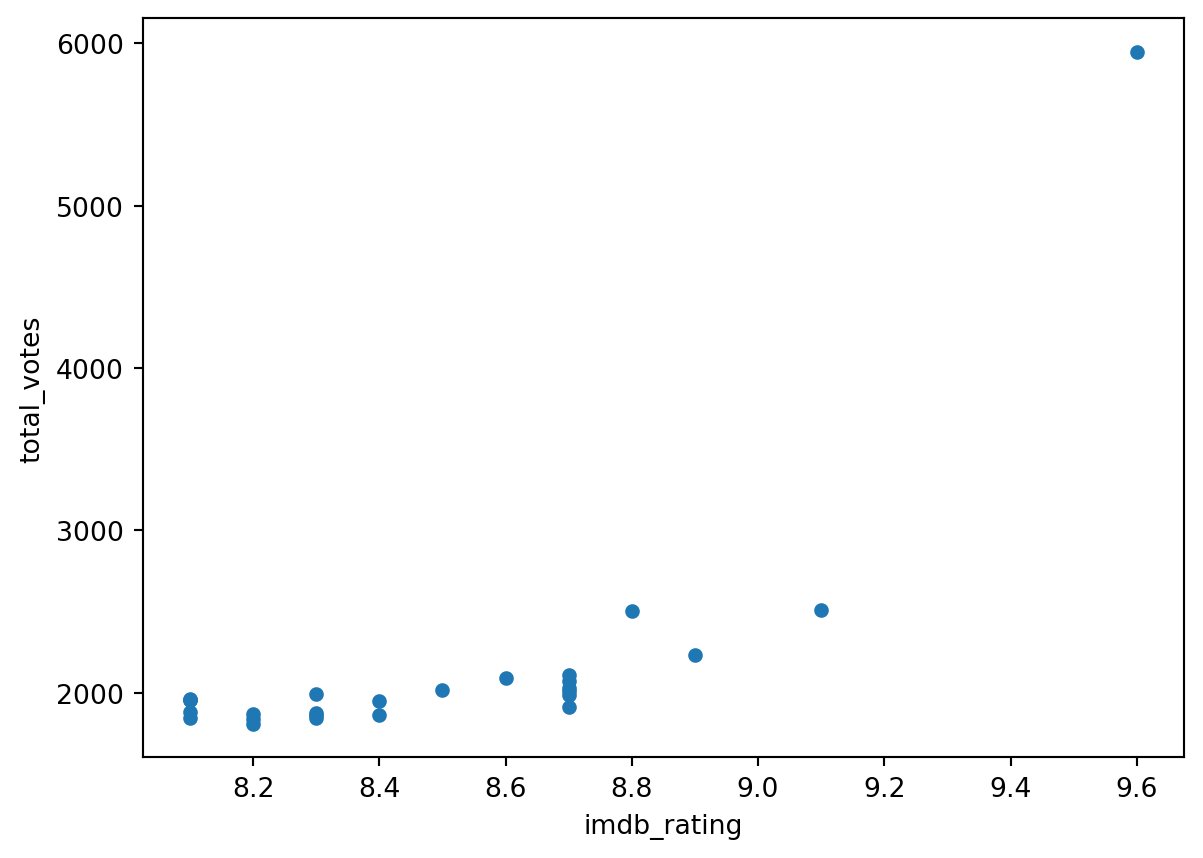

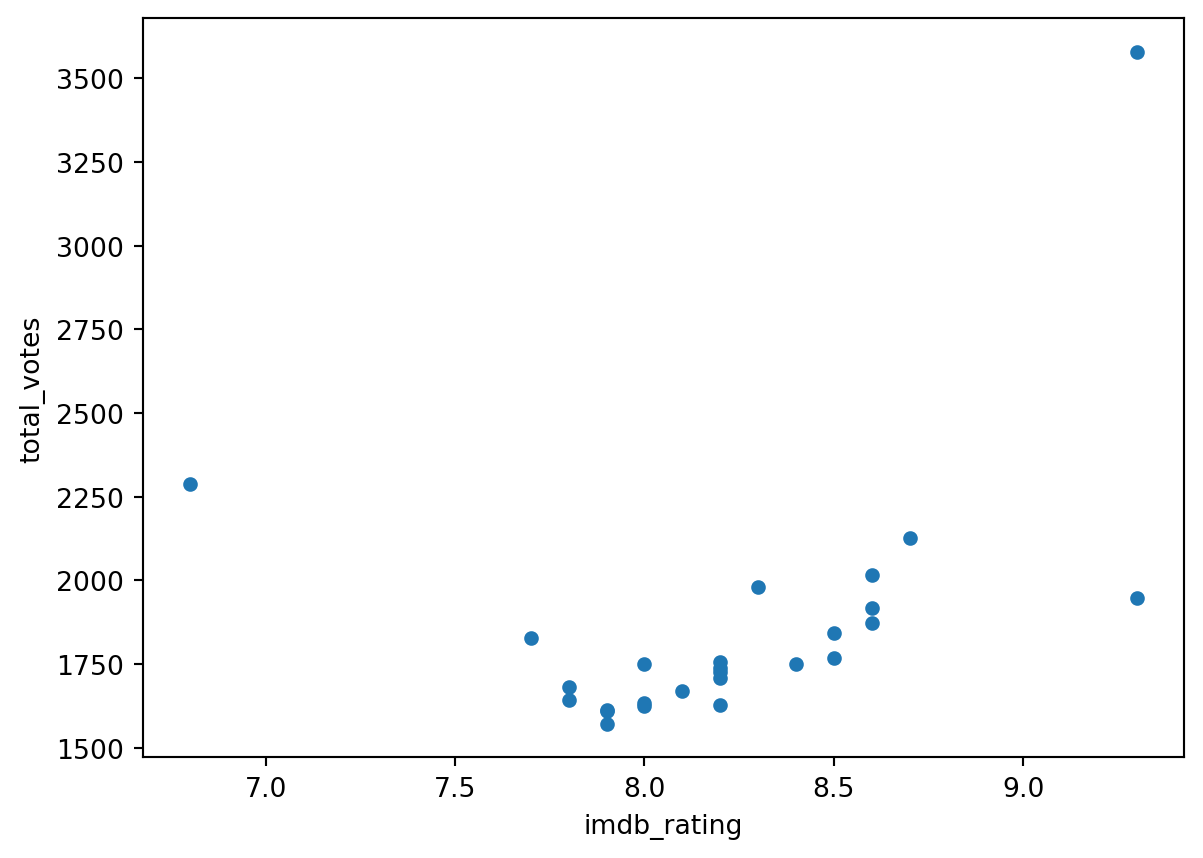

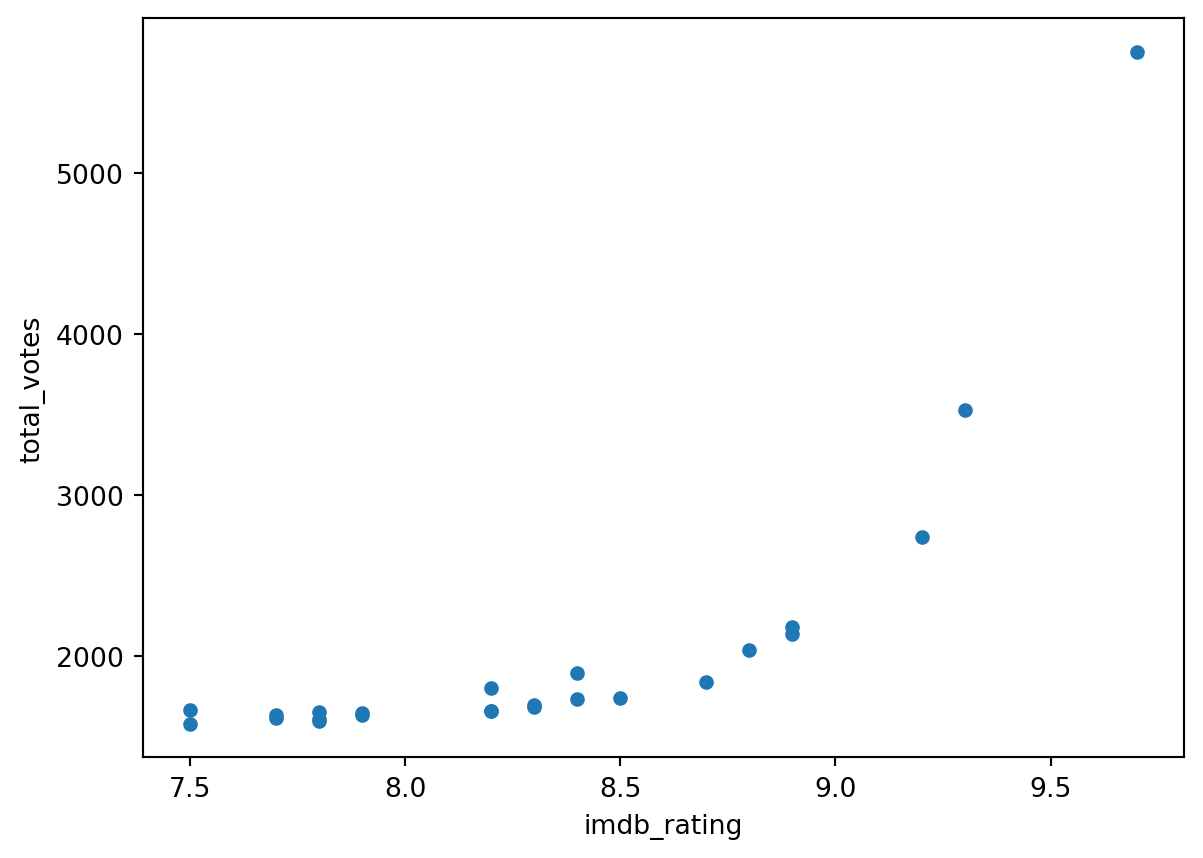

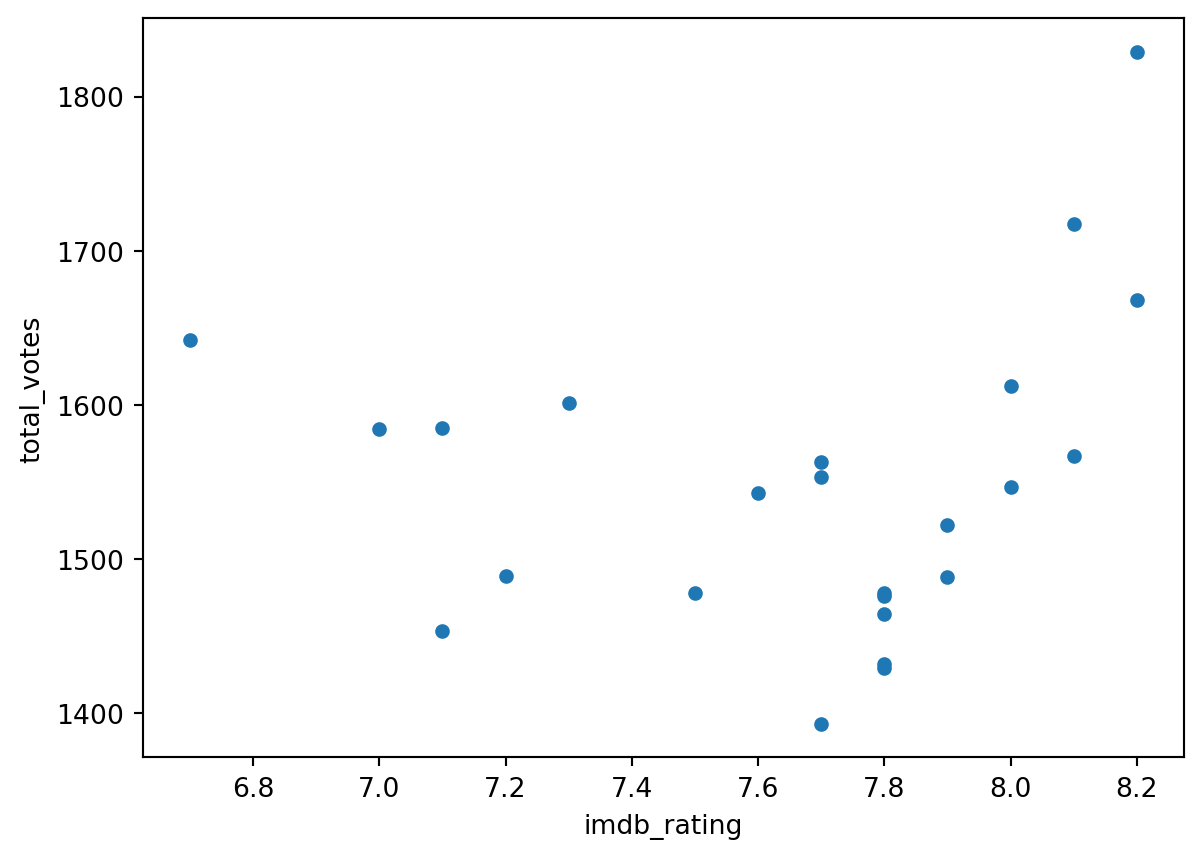

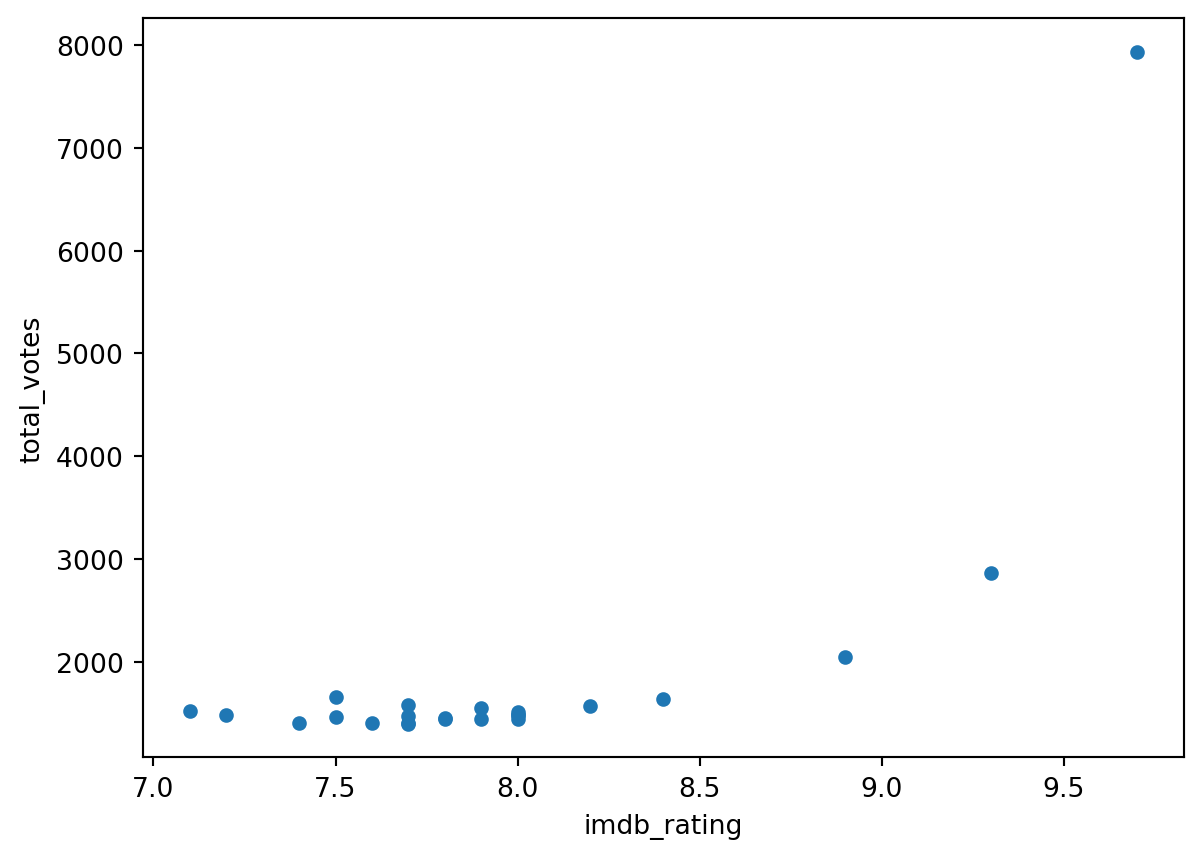

In [20]:
df.groupby('season').plot(
    kind='scatter', y = 'total_votes', x = 'imdb_rating')

There is a lot more you can do with plots with Pandas and Matplotlib. A good resource is the [visualisation section of the pandas documentation](https://pandas.pydata.org/docs/user_guide/visualization.html#basic-plotting-plot).